# Titanic Data

In [60]:
import pandas as pd
TitanicFrame = pd.read_csv('Train.csv', header = 0)
Test_Data = pd.read_csv('Test.csv', header = 0)

In [4]:
TitanicFrame.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
TitanicFrame.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


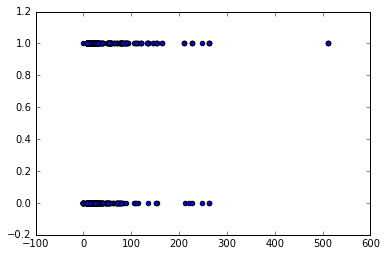

In [6]:
plt.scatter(TitanicFrame['Fare'], TitanicFrame['Survived'])

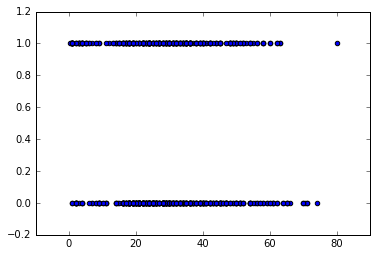

In [7]:
plt.scatter(TitanicFrame['Age'], TitanicFrame['Survived'])

In [8]:
grouped = TitanicFrame.loc[:,['Survived','Age']].groupby('Age').sum().reset_index()
grouped[grouped['Age']<=2]
#plt.bar(grouped['Age'], grouped['Survived'])

,Age,Survived
0,0.42,1
1,0.67,1
2,0.75,2
3,0.83,2
4,0.92,1
5,1.00,5
6,2.00,3


In [9]:
grouped1 = TitanicFrame.loc[:,['Survived','Age']].groupby('Age').count().reset_index()
grouped1[grouped1['Age']<=2]
#plt.bar(grouped1['Age'], grouped['Survived'])

,Age,Survived
0,0.42,1
1,0.67,1
2,0.75,2
3,0.83,2
4,0.92,1
5,1.00,7
6,2.00,10


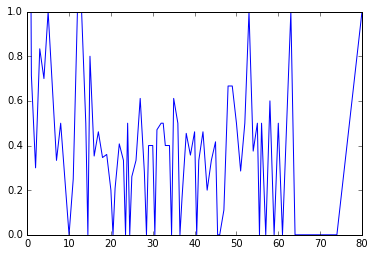

In [10]:
grouped2 = pd.merge(grouped1,grouped, how='outer', on = ['Age', 'Age'])
grouped2['Ratio']= grouped2['Survived_y'] / grouped2['Survived_x']
plt.plot(grouped2['Age'], grouped2['Ratio'])

In [58]:
TitanicFrame[TitanicFrame['Age']==.42]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


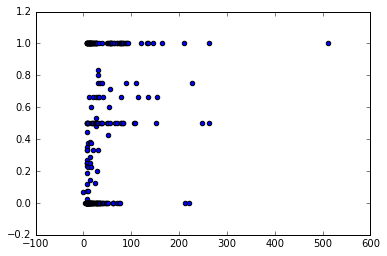

In [14]:
grouped = TitanicFrame.loc[:,['Survived','Fare']].groupby('Fare').sum().reset_index()
grouped1 = TitanicFrame.loc[:,['Survived','Fare']].groupby('Fare').count().reset_index()
grouped2 = pd.merge(grouped1,grouped, how='outer', on = ['Fare', 'Fare'])
grouped2['Ratio']= grouped2['Survived_y'] / grouped2['Survived_x']
plt.scatter(grouped2['Fare'], grouped2['Ratio'])

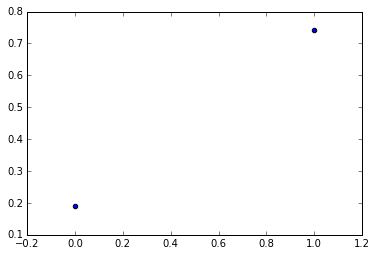

In [61]:
TitanicFrame['Gender'] = TitanicFrame['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
Test_Data['Gender'] = Test_Data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

grouped = TitanicFrame.loc[:,['Survived','Gender']].groupby('Gender').sum().reset_index()
grouped1 = TitanicFrame.loc[:,['Survived','Gender']].groupby('Gender').count().reset_index()
grouped2 = pd.merge(grouped1,grouped, how='outer', on = ['Gender', 'Gender'])
grouped2['Ratio']= grouped2['Survived_y'] / grouped2['Survived_x']
plt.scatter(grouped2['Gender'], grouped2['Ratio'])

In [33]:
TitanicFrame[(TitanicFrame['Age'].isnull())] ##| (TitanicFrame['Sex'].isnull()) | (TitanicFrame['Fare'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,1
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,1
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,0
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,0


Need to fill in the missing data and recalculate the correlation

In [62]:
Median_ages = [[0,0,0],[0,0,0]]
Median_ages_test = [[0,0,0],[0,0,0]]
for i in range(2):
    for j in range(3):
        Median_ages[i][j] = TitanicFrame[(TitanicFrame['Gender'] == i) & (TitanicFrame['Pclass'] == j+1)]['Age'].dropna().median()
        Median_ages_test[i][j] = Test_Data[(Test_Data['Gender'] == i) & (Test_Data['Pclass'] == j+1)]['Age'].dropna().median()
Median_ages

[[40.0, 30.0, 25.0], [35.0, 28.0, 21.5]]

In [63]:
TitanicFrame['AgeFill'] = TitanicFrame['Age']
Test_Data['AgeFill'] = Test_Data['Age']
for i in range(0, 2):
    for j in range(0, 3):
        TitanicFrame.loc[ (TitanicFrame.Age.isnull()) & (TitanicFrame.Gender == i) & (TitanicFrame.Pclass == j+1),\
                         'AgeFill'] = Median_ages[i][j]
        Test_Data.loc[ (Test_Data.Age.isnull()) & (Test_Data.Gender == i) & (Test_Data.Pclass == j+1),\
                         'AgeFill'] = Median_ages_test[i][j]

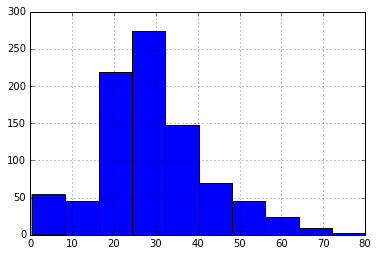

In [46]:
import pylab as P
TitanicFrame['AgeFill'].hist()
P.show()

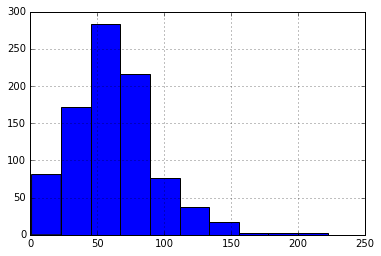

In [48]:
TitanicFrame['Age*Class'] = TitanicFrame.AgeFill * TitanicFrame.Pclass
TitanicFrame['Age*Class'].hist()
P.show()

In [50]:
TitanicFrame.dtypes[TitanicFrame.dtypes.map(lambda x: x=='object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [64]:
TitanicFrame = TitanicFrame.drop(['Name', 'Sex', 'Ticket','Cabin', 'Embarked', 'Age'], axis = 1)
Test_Data = Test_Data.drop(['Name', 'Sex', 'Ticket','Cabin', 'Embarked', 'Age'], axis = 1)

In [142]:
train_data = TitanicFrame.values
test_Data = Test_Data.values
Test_Data[:][370:380]

,PassengerId,Pclass,SibSp,Parch,Fare,Gender,AgeFill
370,1262,2,1,0,11.5000,0,21.0
371,1263,1,0,0,134.5000,1,31.0
372,1264,1,0,0,0.0000,0,49.0
373,1265,2,0,0,13.0000,0,44.0
374,1266,1,1,1,81.8583,1,54.0
375,1267,1,0,0,262.3750,1,45.0
376,1268,3,2,0,8.6625,1,22.0
377,1269,2,0,0,11.5000,0,21.0
378,1270,1,0,0,50.0000,0,55.0
379,1271,3,4,2,31.3875,0,5.0


In [143]:
train_data = train_data[:,1:]
test_Data_1 = test_Data[:,1:]


In [144]:
test_Data_1[400:420,:]

array([[   1.    ,    0.    ,    0.    ,  164.8667,    1.    ,   30.    ],
       [   2.    ,    1.    ,    0.    ,   21.    ,    0.    ,   38.    ],
       [   1.    ,    0.    ,    1.    ,   59.4   ,    1.    ,   22.    ],
       [   1.    ,    0.    ,    0.    ,   47.1   ,    0.    ,   17.    ],
       [   1.    ,    1.    ,    0.    ,   27.7208,    0.    ,   43.    ],
       [   2.    ,    0.    ,    0.    ,   13.8625,    0.    ,   20.    ],
       [   2.    ,    1.    ,    0.    ,   10.5   ,    0.    ,   23.    ],
       [   1.    ,    1.    ,    1.    ,  211.5   ,    0.    ,   50.    ],
       [   3.    ,    0.    ,    0.    ,    7.7208,    1.    ,   22.    ],
       [   3.    ,    1.    ,    1.    ,   13.775 ,    1.    ,    3.    ],
       [   3.    ,    0.    ,    0.    ,    7.75  ,    1.    ,   22.    ],
       [   1.    ,    1.    ,    0.    ,   90.    ,    1.    ,   37.    ],
       [   3.    ,    0.    ,    0.    ,    7.775 ,    1.    ,   28.    ],
       [   3.    ,    0. 

In [146]:
train_data[0::,1::]

array([[  3.    ,   1.    ,   0.    ,   7.25  ,   0.    ,  22.    ],
       [  1.    ,   1.    ,   0.    ,  71.2833,   1.    ,  38.    ],
       [  3.    ,   0.    ,   0.    ,   7.925 ,   1.    ,  26.    ],
       ..., 
       [  3.    ,   1.    ,   2.    ,  23.45  ,   1.    ,  21.5   ],
       [  1.    ,   0.    ,   0.    ,  30.    ,   0.    ,  26.    ],
       [  3.    ,   0.    ,   0.    ,   7.75  ,   0.    ,  32.    ]])

In [147]:
# Import the random forest package
from sklearn.ensemble import RandomForestClassifier 

# Create the random forest object which will include all the parameters
# for the fit
forest = RandomForestClassifier(n_estimators = 100)

# Fit the training data to the Survived labels and create the decision trees
forest = forest.fit(train_data[0::,1::],train_data[0::,0])

In [153]:
# Take the same decision trees and run it on the test data
output = forest.predict(test_Data_1[:300,:])

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [149]:
output

array([ 0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
        1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,
        1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,
        0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.])

In [150]:
Test_Data['SurvivalPrediction'] = output

ValueError: Length of values does not match length of index